<a href="https://colab.research.google.com/github/ayachiii/soturon/blob/main/PLI_Analysis_image%E7%94%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#githubの接続を切りたいとき
%cd soturon
!git pull
%cd ..

In [1]:
!git clone https://github.com/ayachiii/soturon.git

Cloning into 'soturon'...
remote: Enumerating objects: 313, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (174/174), done.
remote: Total 313 (delta 65), reused 9 (delta 9), pack-reused 129 (from 1)
Receiving objects: 100% (313/313), 5.59 MiB | 9.94 MiB/s, done.
Resolving deltas: 100% (121/121), done.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import glob
import re

In [10]:
subject_name_list = ["ishida","yamamoto","ohashi","miyake","mitsuhashi","ko"]
phase_name_list = ["image1","image2","image3"]

In [11]:
# 正規表現でなんとでもなる
# /Users/miyakooti/repositories/arai_MATLAB_program/csv/5_toki/PLIdata
#pathes = glob.glob("/content/arai_MATLAB_program/csv/[0-5]_*/PLIdata/concentration_*.csv")
pathes = glob.glob("/content/soturon/image/PLIdata/PLI_*.csv")
pathes = sorted(pathes)
pathes

['/content/soturon/image/PLIdata/PLI_1_ishida_image1.csv',
 '/content/soturon/image/PLIdata/PLI_1_ko_image1.csv',
 '/content/soturon/image/PLIdata/PLI_1_mitsuhashi_image1.csv',
 '/content/soturon/image/PLIdata/PLI_1_miyake_image1.csv',
 '/content/soturon/image/PLIdata/PLI_1_ohashi_image1.csv',
 '/content/soturon/image/PLIdata/PLI_1_yamamoto_image1.csv',
 '/content/soturon/image/PLIdata/PLI_2_ishida_image2.csv',
 '/content/soturon/image/PLIdata/PLI_2_ko_image2.csv',
 '/content/soturon/image/PLIdata/PLI_2_mitsuhashi_image2.csv',
 '/content/soturon/image/PLIdata/PLI_2_miyake_image2.csv',
 '/content/soturon/image/PLIdata/PLI_2_ohashi_image2.csv',
 '/content/soturon/image/PLIdata/PLI_2_yamamoto_image2.csv',
 '/content/soturon/image/PLIdata/PLI_3_ishida_image3.csv',
 '/content/soturon/image/PLIdata/PLI_3_ko_image3.csv',
 '/content/soturon/image/PLIdata/PLI_3_mitsuhashi_image3.csv',
 '/content/soturon/image/PLIdata/PLI_3_miyake_image3.csv',
 '/content/soturon/image/PLIdata/PLI_3_ohashi_image3

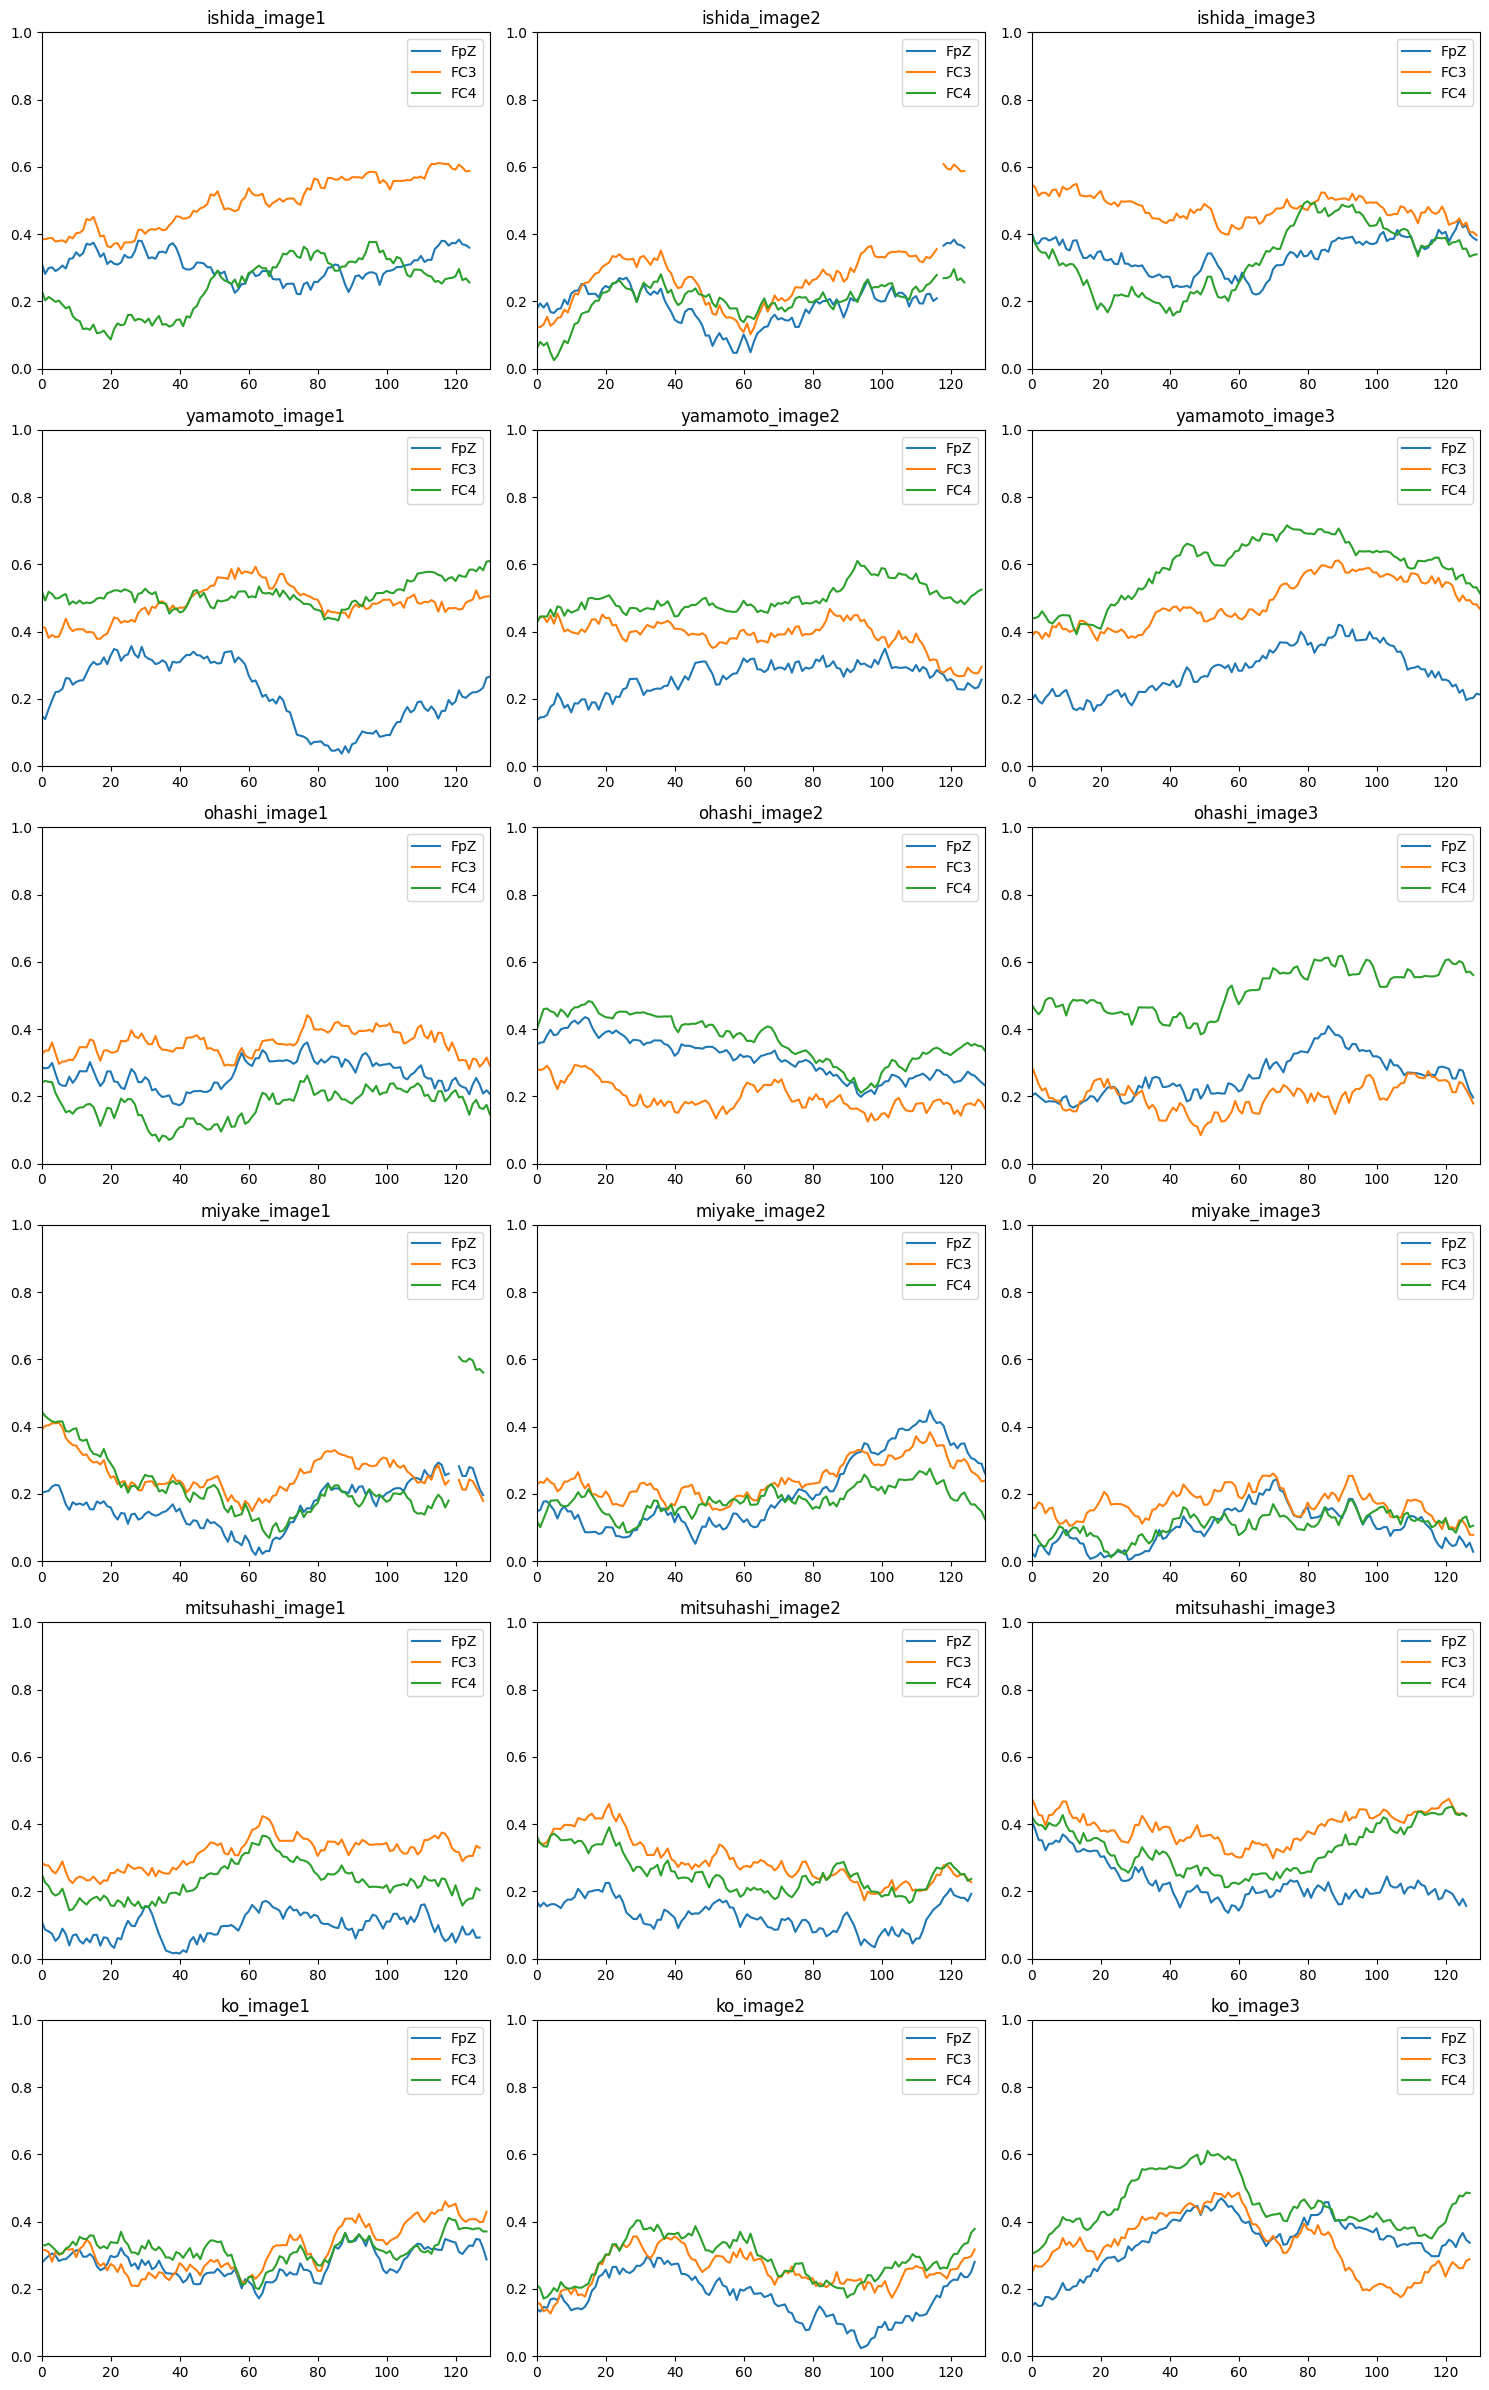

In [14]:
import re # Import re module for robust name extraction

# Mapping for the numeric prefix in the filename and the actual phase name in the filename
phase_file_info = {
    "image1": {"prefix": "1", "filename_part": "image1"},
    "image2": {"prefix": "2", "filename_part": "image2"},
    "image3": {"prefix": "3", "filename_part": "image3"},
}

num_subjects = len(subject_name_list)
num_phases = len(phase_name_list)

# Adjust figsize dynamically for the new layout
fig = plt.figure(figsize=(num_phases * 5, num_subjects * 4))

plot_counter = 0
# Loop through subjects first to arrange them by row
for sub_idx, subject in enumerate(subject_name_list):
    # Then loop through phases for each subject to arrange them by column
    for phase_idx, phase_key in enumerate(phase_name_list):
        plot_counter += 1
        prefix = phase_file_info[phase_key]["prefix"]
        filename_phase = phase_file_info[phase_key]["filename_part"]

        # Construct the expected filename pattern
        expected_filename_pattern = f"PLI_{prefix}_{subject}_{filename_phase}.csv"

        # Find the path in the 'pathes' list
        current_path = None
        for p in pathes:
            if expected_filename_pattern in p:
                current_path = p
                break

        if current_path:
            df = pd.read_csv(current_path)
            # Subplot arrangement: (num_rows, num_columns, plot_index)
            plt.subplot(num_subjects, num_phases, plot_counter)
            plt.ylim(0,1)
            plt.xlim(0,130)

            # Plotting only FpZ, FC3, FC4 as requested
            columns_to_plot = ['FpZ', 'FC3', 'FC4']
            existing_columns = [col for col in columns_to_plot if col in df.columns]
            if existing_columns:
                plt.plot(df[existing_columns])
                plt.legend(existing_columns)
            else:
                plt.text(0.5, 0.5, "Selected columns not found", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

            # Set title using the subject name and the phase key
            plt.title(f"{subject}_{phase_key}")
        else:
            # If a file for a specific subject and phase is not found, plot an empty subplot with a message
            plt.subplot(num_subjects, num_phases, plot_counter)
            plt.text(0.5, 0.5, f"File not found: {subject}_{phase_key}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
            plt.title(f"{subject}_{phase_key} (Missing)")

plt.tight_layout() # Adjust layout to prevent titles from overlapping
plt.show()
